In [50]:
#!pip install pingouin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.9.1 requires scikit-learn>=1.1.0, but you have scikit-learn 1.0.2 which is incompatible.


  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196207 sha256=2bcf3a06af6c583eede9b247a9fa70bc03332ea83b2d4d27d48f49b0e4254812
  Stored in directory: c:\users\vibrsilva\appdata\local\pip\cache\wheels\c0\9f\92\4c574395e1e8e5e08cf73dcb76815a7eaa62921833b6b0f6ad
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=10100d88b6efcc40f30495d9c067fa45ec4e8f74296e9d3f7226d96c862191b6
  Stored in directory: c:\users\vibrsilva\appdata\local\pip\cache\wheels\04\bb\0d\2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built pingouin littleutils
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.3
    Uninstalling scikit-learn-1.1.3:
      Successfully uninstalled scikit-learn-1.1.3


In [51]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from collections import Counter
from scipy.stats import bernoulli
import pingouin as pg

**Tópicos**:
- Testes de Hipótese (Parte II)
     - Metodologia Genérica do Teste de Hipótese
     - Teste para a média com variância conhecida
     - Teste para a média com variância desconhecida
     - Teste t para 2 amostras 
     - Teste de correlação:
         - Pearson
         - Spearman
     - Teste de Dependência 


### Metodologia Genérica do Teste de Hipótese

* Passo 1: Fixar as hipóteses Nula e Alternativa

No primeiro passo, temos que definir se iremos realizar um tese unilateral ou bilateral.

unilateral será quando quisermos testar se a estatística da amostra é maior ou menor que o parâmetro da população, isoladamente.

bilateral será quando quisermos testar que a estatística da amostra é diferente, sendo as condições de maior ou menor testadas simultaneamente.

![](https://oestatistico.com.br/wp-content/uploads/2016/01/poder-teste-oestatistico.jpg)

* Passo 2: Fixar o nível de significância, alfa

* Passo 3: Calcular a estatística de interesse a partir de uma amostra.

* Passo 4: Calcular o p-valor para essa estatística e decidir qual hipótese se mantém.

## Exemplos Práticos

### Teste para a Média Com Variância Conhecida

Uma máquina que enche pacotes de café com variância de 400g2 estava regulada para encher pacotes com 500g. Você decide coletar uma amostra de 16 pacotes e checar se a máquiina ainda está regulada. A amostra de 16 pacotes possui média de 492g. Baseando-se nisso, você para a produção de café para regular a máquina?

In [2]:
# trazendo dados
# variancia
var = 400
# media
u = 500
# numero de amostras
n = 16
# media amostral
ua = 492

Vamos definir nossas hipóteses

**H0**: u = 500g<br>
**H1**: u != 500g

Do teorema do limite central, temos que:

![](https://cdn1.byjus.com/wp-content/uploads/2019/08/central-limit-theorem-formula.jpeg)

Como temos n = 16:

In [3]:
# desvio padrao amostral
desv_a = np.sqrt(var/n)

In [4]:
desv_a

5.0

Então, nossa distribuição amostral da média tem média 500 e desvio padrão 5.

Vamos fixar nosso nível de significância em 0.01. Note que é um teste bilateral.

Agora precisamos calcular a probabilidade (p valor) de encontrarmos um valor de média > 492 ou <492 , numa distribuição de média 500 e desvio padrão 5. Esse será nosso p-valor.

Primeiro, iremos calcular a probabilidade de ser < 492.

Vamos transformar nosso 492 em Z Score e calcular a probabilidade usando o scipy.

In [5]:
z_492 = (ua - u)/desv_a

In [6]:
z_492

-1.6

Como o teste é bilateral, teremos que dividir a área de 1% (nível de significância em 2). Para cada lado, precisaremos encontrar o Z score equivalente.

Para calcular Z a esquerda, precisaremos descobrir que valor de Z nos traz 0.5% dos dados a esquerda.

In [7]:
Z_esquerda = stats.norm.ppf(0.005)

In [8]:
Z_esquerda

-2.575829303548901

Como  são sempre simétricos, Z à direita será igual a Z_esquerdo, porém positivo.

In [9]:
Z_direita = -1*Z_esquerda

Note que a região crítica do teste é aquela em que <= -2.57 e >= 2.57

Nosso Z_492, porém, vale -1.6. Ou seja, é maior que -2.57 e menor que 2.57. Sendo assim, não cai dentro da região crítica.

Ou seja, cai dentro da região de aceitação do teste, indicando que devemos aceitar a hipótese nula, nesse caso e afirmar que

Vamos calcular o p valor?

In [10]:
p_valor = stats.norm.cdf(-1.6)

In [11]:
p_valor*2

0.10959858339911595

Note que 0.10959 é maior que 0.005, que é a área da região crítica à esquerda.

Dessa forma, quando p-valor > nível de significância, não rejeitamos a hipótese nula.

Conclusão: Não parar a produção

### Teste para a Média com Variância Desconhecida

Esse estudo de caso parece mais realista, pois na prática é muito difícil que conheçamos a variância da população. Normalmente, conhecemos a variância da amostra.

Aqui, em vez de utilizar a distribuição Z, trabalharemos com a distribuição T de Student. 

A distribuição t de Student parecida com a distribuição normal. Quando n tende a infinito, ela tende a ser uma distribuição normal. Na prática, quando não conhecemos a variância populacional, podemos utilizar a variância amostral. Quando n < 30, usamos a distribuição de T Student (mais adequada para amostras menores). 

![](https://www.researchgate.net/profile/Zexun_Chen/publication/321085266/figure/fig1/AS:631660630507553@1527611038596/Density-of-the-Student-t-distribution-for-1-2-5-and-10-degrees-of-freedom-compared-to.png)

Como o t de student é a mesma coisa do teste z, que aplicamos anteriormente, para n muito alto, podemos usar sempre o teste t para ambas as situações.

**Exemplo Prático**

Um fabricante de cigarros afirma que seus cigarros não contêm mais que 30 mg de nicotina. Um fiscal do ministério da saúde coleta 25 cigarros para análise. Ao analisá-los ele identifica que a média de nicotina na amostra é de 31.5 mg e o desvio padrão igual a 3mg.

Admitindo um nível de confiança de 95%, devemos ou não multar a fábrica de cigarros?

![](https://cdn-media-1.freecodecamp.org/images/1*frSLeAx5ObJWzD3L6a7Szw@2x.png)

In [12]:
# média da amostra
u_amostra = 31.5
# desvio padrão da amostra
std_amostra = 3
# média da população
u_pop = 30
# número de elementos na amostra
n=25

In [13]:
# Cálculo de t 
t_direita = (u_amostra-u_pop)/(std_amostra/np.sqrt(25))

In [14]:
t_direita

2.5

Qual estatística t corresponde a um nível de significância de 5%?

In [15]:
alfa = 0.05
stats.t.ppf(alfa, df=24)

-1.7108820799094282

lembre-se que a função ppf retornaa a área (probabilidade) à esquerda de t isso significa que 5% dos nossos dados na distribuição t estão abaixo de t = -1.71. Porém, nosso teste é a direita. Então, precisamos descobrir qual valor de t deixa 95% à esquerda e 5% à direita.

In [16]:
stats.t.ppf(0.95, df=24)

1.7108820799094275

Note que é exatamente o simétrico para alfa = 0.05.

No nosso caso, vemos que o t_direita é maior que o t que delimita a região crítica, indicando que a estatística do teste está dentro da região crítica. Assim, podemos concluir que a hipótese nula deve ser rejeitada.

Por fim, vamos calcular o p-valor.

O p valor é a probabilidade de observarmos um valor de t maior ou igual ao que encontramos. Novamente, vamos lembrar que a função só calcula a probabilidade para valores à esquerda. Então precisamos ou calcular usando o simétrico de t. 

In [17]:
stats.t.cdf(x=-t_direita, df=24) # df é o grau de liberdade

0.009827087558289377

Como p-valor é menor que o nível de significância, podemos rejeitar a hipótese nula e a empresa de cigarro deve ser multada.

**Vamos ver a implementação do teste T  de uma maneira mais direta**

Por padrão, o teste t do ```scipt.stats``` é bilateral, ou seja, sua hipótese nula é que as médias são <i>iguais</i> e sua hipótese alternativa é de que as médias são <i>diferentes</i>

In [18]:
# criando distribuição normal com média 5
np.random.seed(10)
rvs = stats.norm.rvs(loc=5, scale=10, size=(50))

In [19]:
media_teste = 5
t_bi, p_bi = stats.ttest_1samp(rvs, media_teste)

In [20]:
# Estatística t
t_bi

0.7962654899482874

In [21]:
# p valor
p_bi

0.42971877541279346

Assumindo um alfa de 0.05, nós aceitaríamos a hipótese nula de que a média da população realmente é 5.

Mas e se quiséssemos fazer um teste unilateral??

Vamos ver a média da amostra

In [22]:
# média da amostra
rvs.mean()

6.024862201673477

A média da amostra é 6.024

Vamos testar a hipótese de que H0: médias iguais e H1: média > 5

In [23]:
t_uni = (rvs.mean() - 5)/(rvs.std(ddof=1)/np.sqrt(50))

A função abaixo nos retorna a probabilidade de termos um t < t_raiz

In [24]:
stats.t.cdf(t_uni, df=49)

0.7851406122936033

Para encontrarmos a probabilidade de t >= t_raiz, subtraímos o resultado acima de 1.

In [25]:
1 - stats.t.cdf(t_uni, df=49)

0.21485938770639668

Ou seja, há uma probabilidade de 21.48% de observarmos um valor de t >= a t_raiz

Como p-valor > alfa, não rejeitamos a hipótese nula.

Num teste bilateral, o <i>p-valor é 2 vezes o p-valor do teste unilateral</i>. Dessa forma, chegaríamos ao mesmo resultado, dividindo o p-valor do teste bilateral por 2.

In [26]:
p_bi/2

0.21485938770639673

### Teste t para 2 amostras

Até agora temos considerado uma única população e tentamos realizar uma inferência para esta. Agora veremos um exemplo de teste aplicado à duas populações.

No dia a dia, independente de sermos cientistas de dados ou não, nos deparamos com questões do tipo: A campanha A convertou mais que a campanha B? O medicamento A é mais eficaz que o medicamento B?

Isso equivale a comparar dois conjuntos de informações resultantes das medidas obtidas  de dois experimentos. De maneira geral, um primeiro grupo, A, é dado como grupo de controle (ex: grupo que não recebeu uma campanha) e é comparado a um grupo B (ex:grupo que recebeu a campanha) o qual recebe um tratamento (aplicação de um medicamento, campanha, entre outros).

OBS: O tratamento matemático desse tipo de teste é mais complexo e exigira mais aulas. Assim, nos limitaremos a conhecer a aplicação desse tipo de teste no Python.

In [27]:
# extraindo 2 amostras 
p_list = []
np.random.seed(123)
for i in np.arange(0,50000):
    a1 = stats.norm.rvs(loc=1500, scale=150, size=50)
    a2 = stats.norm.rvs(loc=1500, scale=100, size=50)
    t, p = stats.ttest_ind(a1,a2)
    p_list.append(p)

In [28]:
(np.array(p_list) <= 0.05).sum()/len(p_list)

0.05024

In [29]:
np.random.seed(51)
a1 = stats.norm.rvs(loc=1700, scale=150, size=50)
a2 = stats.norm.rvs(loc=1500, scale=100, size=50)

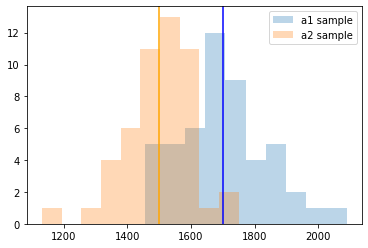

In [30]:
plt.hist(a1, label='a1 sample', alpha=0.3)
plt.axvline(a1.mean(),color= 'blue')
plt.axvline(a2.mean(), color='orange')
plt.hist(a2, label='a2 sample', alpha=0.3)
plt.legend()
plt.show()

In [31]:
t, p = stats.ttest_ind(a1,a2)

In [32]:
p

1.2495036718593313e-12

Rejeitamos a hipótese nula de que as distribuições tem mesma média.

### Teste de correlação

Utilizando o teste para a correlação vamos, antes de utilizar nossas features em um modelo, testar se são estatisticamente significantes.

Correlações podem enganar

In [33]:
# gerando dados aleatorios
np.random.seed(100)
x_random = np.random.randint(1,100,20000)
y_random = np.random.randint(1,100,20000)

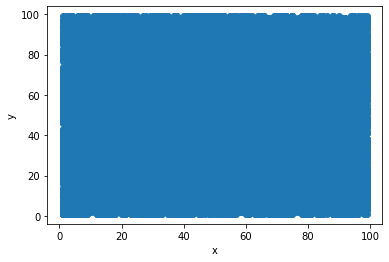

In [35]:
plt.scatter(x_random , y_random)

plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [36]:
df_random = pd.DataFrame({'x' : x_random , 'y' : y_random})

In [37]:
#extraindo samples
df_random_50 = df_random.sample(50)
df_random_100 = df_random.sample(100)
df_random_500 = df_random.sample(500)

In [38]:
df_random_50.corr()

,x,y
x,1.000000,0.152621
y,0.152621,1.000000


In [39]:
df_random_100.corr()

,x,y
x,1.000000,0.018651
y,0.018651,1.000000


In [40]:
df_random_500.corr()

,x,y
x,1.000000,-0.005542
y,-0.005542,1.000000


Note que a correlação vai estabilizando para o valor esperado de 0, já que geramos um dataset randômico

In [41]:
# vamos ler dados sobre empréstimos e estudar os testes de correlação
df_loan = pd.read_csv('loan.csv')

In [42]:
# Convertendo para 1 e 0 a coluna de loan
df_loan.loc[df_loan['loan_status'] == 'PAIDOFF', ['loan_status']] = 1
df_loan.loc[df_loan['loan_status']!=1, ['loan_status']] = 0

In [43]:
df_loan['loan_status'] = df_loan['loan_status'].astype('int')

Vamos extrair as correlações de pearson para as colunas loan_status, terms e age

In [44]:
df_loan_p = df_loan.loc[:,['loan_status','terms','age']].corr()

Se estamos construindo um modelo preditivo, é interessante procurar por associações e correlação com o target

In [45]:
df_loan_p['loan_status']

loan_status    1.000000
terms         -0.108395
age            0.018939
Name: loan_status, dtype: float64

In [46]:
df_loan.groupby('loan_status').mean()

,Principal,terms,past_due_days,age
loan_status,,,,
0,955.5,23.885000,36.01,30.975
1,935.0,22.116667,NaN,31.210


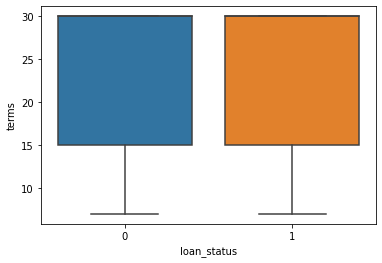

In [47]:
sns.boxplot(x='loan_status', y='terms', data=df_loan)
plt.show()

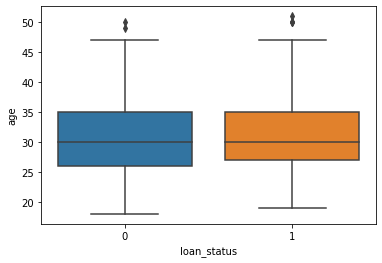

In [48]:
sns.boxplot(x='loan_status', y='age', data=df_loan)
plt.show()

In [52]:
#usando biblioteca pingouin 
pg.corr(df_loan['loan_status'], df_loan['terms'], methods = 'pearson')

,n,r,CI95%,p-val,BF10,power
pearson,500,-0.108395,"[-0.19, -0.02]",0.015314,1.05,0.680195


In [53]:
pg.corr(df_loan['loan_status'] , df_loan['age'] , method = 'pearson')

,n,r,CI95%,p-val,BF10,power
pearson,500,0.018939,"[-0.07, 0.11]",0.67268,0.061,0.070668


In [54]:
# usando a biblioteca scipy
p_corr_terms, p_p_terms = stats.pearsonr(df_loan['loan_status'], df_loan['terms'])

In [55]:
p_corr_terms, p_p_terms

(-0.10839544070972226, 0.015313538429204306)

In [56]:
p_corr_age, p_p_age = stats.pearsonr(df_loan['loan_status'], df_loan['age'])

In [57]:
p_corr_age, p_p_age

(0.01893926255939875, 0.6726800061535693)

## Teste Cramer V

Em estatística, o V de Cramér é uma medida de associação entre duas variáveis ​​nominais, dando um valor entre 0 e +1

In [63]:
# cramer V
def cac(df, cat_cols):
    df=df
    cat_cols=cat_cols
    # dicionário para guardar o cramer V de cada coluna em relação às demais
    dict_cramer = {}
    # primeiro for loop é para percorrer as colunas categóricas
    for cat in cat_cols:
        # lista para guardar os valores obtidos de cramer v a cada coluna 
        cramer_v_list = []
        # segundo for loop é para percorrer para uma variável categórica todas as colunas do dataframe
        for cat_ in cat_cols:
            # gerando a tabela de contingência
            df_cross = pd.crosstab(df[cat], df[cat_])
            # extraindo o valor de chi2
            chi2_teste, p, df_, arr = stats.chi2_contingency(df_cross)
            # calculando o número de linhas
            r = len(df_cross)
            # calculando o número de colunas
            c = len(df_cross.columns)
            # calculando a soma dos elementos das células
            n = df_cross.to_numpy().sum()
            # calculando o V de cramer
            V = np.sqrt((chi2_teste/(n*(np.min([r,c]) -1))))
            # appendando o resultado na lista
            cramer_v_list.append(V)
        # salvando para um elemento do dicionário a lista contendo os V de cramer correspondentes
        dict_cramer[cat] = cramer_v_list
        # criando dataframe a partir do dicionário
        df_v_cramer = pd.DataFrame(dict_cramer)
        # adicionando o índice com o nome das variáveis
        df_v_cramer.index=cat_cols
    return df_v_cramer

In [64]:
cramer_v_matrix = cac(df_loan, cat_cols=['loan_status', 'Gender','education'])

In [65]:
cramer_v_matrix['loan_status']

loan_status    0.995833
Gender         0.071256
education      0.033123
Name: loan_status, dtype: float64

Logo notamos que nenhuma das variaveis possui correlação forte com Loan_Status

### Teste de chi2

O teste Chi Quadrado de Pearson é um teste de hipóteses estatístico utilizado para comparar duas variáveis categóricas.Temos algumas suposições que devem respeitadas para usar o teste Chi Quadrado:
   - Independência entre as observações e variáveis
   - Pelo menos 5 observações para cada casela da tabela
     
Não Utilizar quando :
  - Quando temos dependência entre as observações
  - Quando temos caselas na tabela com menos de 5 observações
  - Quando as variáveis não são categóricas
       

In [67]:
# Testando a significância do Chi2 para as variáveis
cat_cols=['loan_status', 'Gender','education']
for cat in cat_cols:  
    table = pd.crosstab(df_loan['loan_status'], df_loan[cat])
    chi2, p, dof, expected = stats.chi2_contingency(table.values)
    print(f'Feature: {cat}')
    print(f'p-valor: {p}')
    print(10*'-')

Feature: loan_status
p-valor: 7.632584767734904e-110
----------
Feature: Gender
p-valor: 0.11108728958553357
----------
Feature: education
p-valor: 0.9080976609678291
----------


comparar com o nível de significancia, caso seja menos que ele podemos concluir que há 